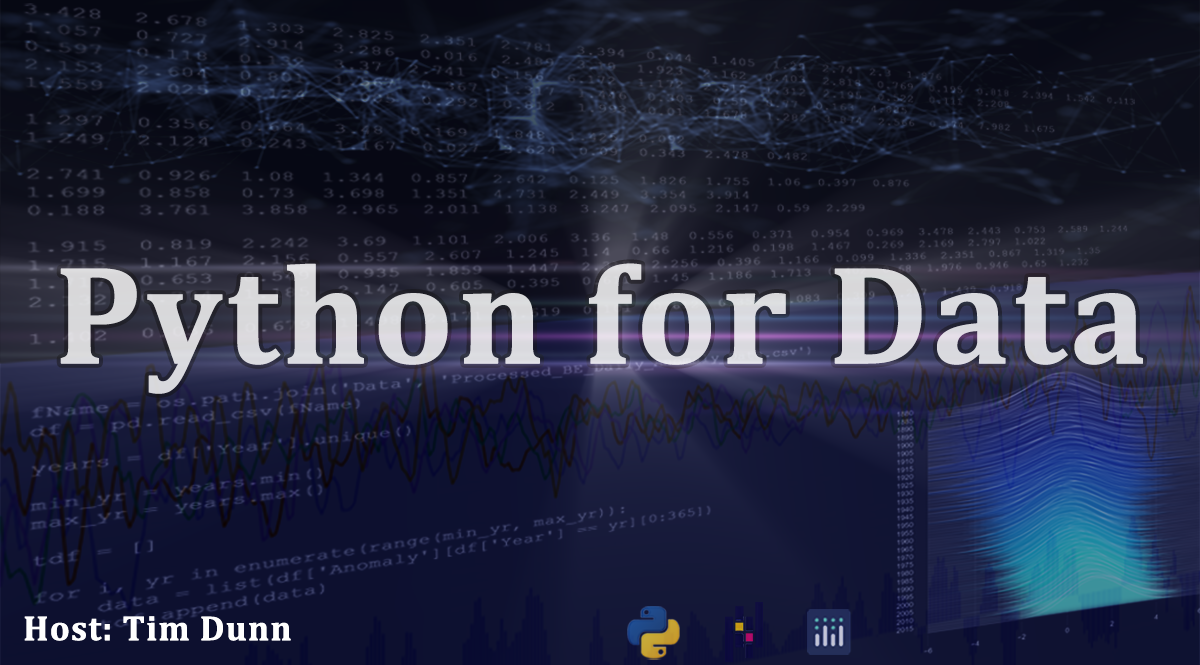

In [ ]:
%%html
<style>
table {float:left}
</style>

# **Reproducible Data Workflows Using Python**  

You have probably heard it said that "Data is today's modern gold rush". There pretty much no exageration in that excalmation.   
Regardless of your background or your future you will find yourselves tasked with working with data.   
  
The two premier langauages for working with data are <b>R</b> and <b>Python</b>.  
They both have the strengths and weaknesses but if you are working with data odds are you will work with one or even both of these languages.  
  
Today we will look at the <b>Python</b> side using a package called <b>Pandas</b>.  
Pandas is one of, actually '<i>the</i>, pillar for science workflows using Python.  
There are other packages which promise even more then Pandas has to offer in two major aspects but we will not cover those today other then being included in a Bonus section for your exploration if you choose to dig deeper.


First a note on the first half of the title for todays workshop - <b>Reproducible Data Workflows</b>.  
No matter when, where, why you are working with data you should always strive to make the workflow as reproducible as possible.  
  
Why?  
- Odds are you will at some point come back to your workflow for whatever reason and if you don't work in a reproducible manner you very welll may spend more time trying to reproduce your work then you did the first time you created it!
- You may have need or are asked to share the data and the method of creating it with collegues
- If you plan to publish your data or even the results of your data you will most likely be asked to share the pipeline to recreate it
- It is just the proper mindset and practice to ALWAYS work with. Espceially in time crunch situtations!


## **Prep Work For Todays Workshop**

To follow along with this workshop you have the option of using the provided AWS Docker service provided to everyone enrolled in todays workshop.  
Alternatively and I I HIGHLY suggest you go this route so you can work on your own machines whenever whereever you may need/desire.  

Depending on how you have your Python environment setup (eg your own personal custom install, Anaconda, MiniConda, ect) you may or may not have the following three packages installed which we will be using today;
 - <i><b>pandas</b></i>
 - <i><b>numpy</b></i>
 - <i><b>requests</b></i>
 
If you installed Python via Anaconda the only one you maybe lacking is <i><b>requests</b></i>.  
  
If you need to install them then uncomment the appropriate line(s) below and execute/run the cell.

In [ ]:
#!pip install pandas
#!pip install numpy
#!pip install requests

If you think you have everything properly install when you execute the following cell you should not see any errors.  
  
If you do see an error go to the above cell, uncomment out the required package line and run the cell.

In [ ]:
import pandas as pd
import requests
import numpy as np
import os

# **First an Aside on Best OS File Management Coding Practices**  
  
As we all, hopefully, know there are major differences between who MaCOS, Windows, Linus and others handle files.  
Even the orgainization of the directory/folder paths are different between operating systems.  
To work safely so anyone on most any system can reproduce your code we will us Pythons '<b>os</b>' packages which does most of the nasty  work for us.  
  
In particular, for today, we will utilize the '<b>os.path</b>' sub-module which allows us to work with file/directory/folder paths and naming. 


## **Proper Path and File Practices**  

What we are most interested in is joining file names to their directory/folder paths.

We can load the package using the Python import as;  
```python
import os
```
  
We can then use the '<b>join</b>' function to join a directory/folder path to the file name.  
  
For example:  

In [ ]:
import os

folderpath = 'Data'
filename = 'foo.txt'

fname = os.path.join(folderpath, filename)

print(fname)

<b>Note:</b> In the above example that path is relative to our current working directory. We can just as easily create a direct path to data anywhere on any drive you have access to.

## **Folder Creation**  

This is all fine and dandy and exactly what we need but we are interested in reproduciable practices.  

So lets pretend you are in a workshop and will be placing data into a folder that was not pre-created for you (Oh wait thats exactly what's happening today!)  
  
When working reproducibally we should check to see if the desired directory/folder exists if not then create it.  
Yes you can manually do this but, again, we are interested in reproduciable workflows so don't assume ANYTHING from an end user.  


We will once again make use of both <i><b>os</b></i> and <i><b>os.path</b></i> to create a directory if it does not already exist.  
  
First we will check to see the desired folder exists using a function nicely named '<b>exists()</b>'.  

If <i><b>os</b></i> can not find such a directory then is will use an <i><b>os</b></i> function called '<b>makedirs()</b>' to create it.  


In [ ]:
if not os.path.exists('Data'):
    os.makedirs('Data')

Yes, For those that are familar with this method you may be thinking 'Uhmmm why not just use the input parameter setup with <i><b>exist_ok=True</b></i>?  
It's nothing more then coding style. Both will work and it would shorten the above code to a single line;
  
```python
os.makedirs('Data', exist_ok=True)
```

But often you may want to add other things into the code and the first method we covered is more extensible for this behavior.

Alternatively, for the more advanced developers building larger more complex Python programs you may opt for something known as <i>try-except</i> exception handeling.  
I will not be going into advanced Python coding today.  
But to give you and idea how this works you would do something like this.  
  
```python
try:
    os.makedirs('Data')
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
```

Now that we know how to work with folders and file paths its time to start thinking about our data!

# **Obtaining Raw Data From the Internet**  

There are a several of ways of getting data from the internet.  
We could simple just go to the site download the data and save it. For reproducible science you '<i>should</i>' want to get the data progammtically.   
  
This process is often refered to as webscraping, datamining or a few dozen other things depending on what you need to accomplish and your end needs.
  
There are a VAST number of ways of obtaing data from websites and many sites save data out in special data servers which have their own methods of obtaining data such as;
 - Normal url pages 
 - Github and GitLab
 - OSF (Open Science Framework)
 - DAP Servers 
 - LDAP Servers
 - DAAC Servers
 - Kaggle (Ok this is really a one off but its extremely popular data repository)
 - and many many others
   
Likewise you can literally 'scrape' data contained on a webpage or pages, web-pdf, tables, ect.  
If you want to go down that route with Python I recommed looking first at a package called 'BeautifulSoup' (https://www.crummy.com/software/BeautifulSoup/).  
We won't go into web-scrapping today but **<a href="https://www.colorado.edu/crdds/events">CRDDS</a>** often has workshops centered on web-scrapping.  


## **About our First Set of Data - BerkleyEarth Climate Data**  
  
The data we will first look at comes from a simple webpage hosted by Berkley University called BerkelyEarth: http://berkeleyearth.org/data/  
BerkleyEarth contains some interesting compiliations of Climate data.

The data we are interested in is the "<i><b>Daily Land (Experimental; 1880-Recent) - Average Temperature</b></i>"   
This data contains daily global LST (Land Surface Temperature) anomaly data.  
Meaning they calculated the mean temperature from Jan 1951 - Dec 1980 (one full climate record which is 30 years) and then subtracted this from the actual average temperatures.  

<B>NOTE:</b> This is a workshop working on data gathering, munging, and analysis and not one on climatology so we will skip the methods, merits, and demerits of any of our data we will work with today.

## **Obtaining the Data From BerkleyEarth**  

To get our data we will use Pythons <i><b>requests</b></i> package.  
We see find the website the url for the data we want to get is: 'http://berkeleyearth.lbl.gov/auto/Global/Complete_TAVG_daily.txt' so we add that to a variable '<i>url</i>'.  
  
Next we use <i><b>requests</b></i> function <b>get()</b> to download our data from our url telling it the data is in a '<i>text/i>' file format.  
    
We can now save the downloaded data to a text file which we will call '<i>Complete_TAVG_daily_RAW.txt</i>'  
  
We save the file by opening ('<i><b>open</b></i>') the file telling python we want to write '<b>w</b>'.  
We do this using a special/safe method known and "<i>with/as</i>".  We use this method becuase;
 - It Provides a safe method to open the file
 - Provides built in error/exception handeling 
 - Provides better error messgages if an error occurs making it easier to fix the code
 - Automatically closes the file for us
 - Allows for additional processing of the file before its finally saved if you so wish to do it here
   
Note our file is an object which we call '<b>f</b>'.    
  
Then we <b>write</b> the data ('<i>datafile</i>') to the file object which both saves the file and then closes it for us.
    

In [ ]:
url= 'http://berkeleyearth.lbl.gov/auto/Global/Complete_TAVG_daily.txt'
datafile = requests.get(url).text

fName = os.path.join('Data', 'Complete_TAVG_daily_RAW.txt')
with open(fName, 'w') as f:
    f.write(datafile)

# **Pandas For All Things Data (sort of)**  
  
Pandas is a Python package setting the standard for data processing, manipulation and analysis. It works with any data that can be expressed as 'relational', 'labeled' and/or 'timeseries' data.  
But even beyond that there are tricks allowing most any data to work with Pandas.  

Pandas works of of one of two basic data structures;
- Series - data such as a singular list or 1D array of data
- DataFrame - data such as an Excel, csv file, 2D gridded data ect.
  
Pandas contains a huge multitude of functions allowing you to; 
- Align and/or reshape data
- Convert between file format types
- Work with missing and NaN data within your datasets
- Index, slice, subset data
- Insert and/or delete data
- Replace data
- Merge, Joing, Concatenate data and whole datasets
- Work conditionally with data
- And so, so, so much more!
  
  
  
  


 ## **Reading and Writing Data With Pandas**  

Below is a list of the most common file format types supported directly with Pandas along with the functions used to read and write to these formats.  
Note; As we shall explore shortly you can open files of any type mix, match, merge, ect them together and save them out to any available type even mnay that don;t appear in the below list!  
  
| Data Format | Reader Fxn | Writer Fxn |
|:---------------- |:---------------- |:--------------|
| From Clipboard |read_clipboard() |to_clipboard() |
| CSV |  read_csv() | to_csv()|
| Excel |read_excel() |to_excel() |
| Feather |read_feather() |to_feather() |
| Fixed-WidthText |read_fwf() |to_fwf() |
| Google BigQuery |read_gbq() |to_gbq() |
| HDF5 |read_hdf() |to_dhf() |
| HTML |read_html() |to_html() |
| JSON |read_json() |to_json() |
| LaTeX | -NA- |Styler.to_latex() |
| OpenDocument |read_excel() | --NA- |
| ORC |read_orc() | -NA- |
| Parquet |read_parquet() |to_parquet() |
| Python Pickle |read_pickle() |to_pickel() |
| SAS |read_sas() |to_sas() |
| SPSS |read_spss() |to_spss() |
| SQL |read_sql() |to_sql() |
| Stata |read_stata() |to_stata() |
| XML |read_xml() |to_xml() |  


-NA- == Not currently available.  
  
  
Note that there is the possibility, via some cool trickery, to work with other formats (eg netCDF) by using other packages in conjunction with Pandas.  
Theres an example at the end that hints at how I work with netCDF in Pandas thanks to how other packages adopt the Pandas DataFrame structure to handle such formats which interchange seamlessly with Pandas.

## **Loading the Text Data to a Pandas DataFrame**  
   
To read in our .csv file into a Pandas DataFrame we first specify the path and name of the data file we want to work with.  
We store the read in datafile as variable. 
You will often see the variable name as '<i><b>df</b></i>' for DataFrame but it can be anything you desire to call it. However adding 'df' somehow to that variable lets you and others know what specifically that variable holds!  
  
Next, in our example, we specify the column header names which we want to call them and save them in the variable '<i>columns</i>'.   
  
Next we read in the file into a Pandas DataFrame which we will call '<i><b>df</b></i>' using the pandas function '<i><b>read_csv()</b></i>' using the following input parameters;  
<b>read_csv(<i>fName, sep, skiprows, names</i>)</b>
<b>Where</b>

 - <b>fName</b> - The path and name of the file we want to load
 - <b>sep</b> - This tells Pandas what kind of seperator used to parse the data into unique columns. Our text data uses multiple spaces so we use '<i>\s+</i>'
 - <b>skiprows</b> - This tells Pandas we want to skip the first N(for us 24) rows of data. 
   - ALternatively you can specify a comments delimiter here it would be '%'
 - <b>names</b> - This tells Pandas we want to use a specified list of names as our column labels/header
   
<b>Note:</b> If you have data files with headers Pandas will automatical make those the column headers for you.  
In the case of multi-line headers you need to specify how many rows of headers you want/need.  
 

In [ ]:
fName = os.path.join('Data', 'Complete_TAVG_daily_RAW.txt')

columns=['DateNumber','Year','Month','Day','DayofYear','Anomaly']
df = pd.read_csv(fName, sep='\s+', skiprows=24, names=columns)

df # This will display the new DataFrame in the output cell below

## **Cleaning Up Our Data**

We have no need of the first column 'DateNumber' so lets drop it.  
We need to specify the axis pandas is supposed to work with.  
- Rows &nbsp; &nbsp; &nbsp; ==> &nbsp;axis=0  
- Columns ==> &nbsp;axis=1  
  
Instead of creating a copy of the data we simply tell pandas to update the current DataFrame with '<b>inplace=True</b>'  

In [ ]:
df.drop('DateNumber',axis=1, inplace=True)

df

## **Saving Our Data To A CSV File**  
  
Now we save our data out to a new csv file so we can use it for whatever we desire in the future without having to reprocess the data each time we want to work with it.   
We will save it as a .csv file using the Pandas function '<b>to_csv()</b>.  

In [ ]:
fName = os.path.join('Data', 'Processed_BE_Daily_Anomaly_Data.csv')
df.to_csv(fName)

We can now read in our new data file and look at it. 

In [ ]:
df1 = pd.read_csv(fName)
df1

Well that's 'almost' what we want but notice that when Pandas saved the file it saved it with an unexpected '<i>Unamed:0</i> column known as an index column.  
We do not want that column in our data so lets resave the DataFrame this time telling it to NOT add an index column.  
  
To do this we use an input parameter '<b>index=False</b> telling it we do not want to save with an index via the bool <b>False</b>.

In [ ]:
df.to_csv(fName, index=False)

Now if we read in the csv file things look exactly the way we want it!

In [ ]:
df1 = pd.read_csv(fName)
df1

# **Viewing Dataframes**  
  
We have already seen one way to quickly look at our data using by just looking at the variable that holds the DataFrame.  
<code>> df</code>  
  
But Pandas offers many ways to look at the data which will become EXTREMELY useful to you in all your data adventures.

### **Heads and Tails**  

<b>df.head()</b> allows you to look at the first N number of rows of your DataFrame.

In [ ]:
df.head()

If we wanted to look at more or less rows of data we can specify how many we want to see.

In [ ]:
df.head(2)

In [ ]:
df.head(10)

Likewise we can look at the end of the DataFrame as well by using the <b>tail()</b> function

In [ ]:
df.tail()

And of course we can specify the number of rows from the end to look at.

In [ ]:
df.tail(2)

In [ ]:
df.tail(10)

For actually working with the data there is another method which we shall look at in a minute called <i><b>slicing</b></i>.  
  
But first lets find out what the overall dimensions of the data looks like.

### **DataFrame Shape**  
  
We can find the overall dimensions of a DataFrame with the <b>shape</b> function.  

In [ ]:
df.shape

<b>NOTE:</b> notice we do not use the normal Python function call with parenthesis such as;  
<code>df.shape()</code>

This is thanks to some funcky cool 'class method' coding which is well beyond the scope of todays workshop.  

What the <i>shape</i> tells us is we have;  
 - 51628 rows of data in the DataFrame
 - 5 columns of data in the DataFrame
  
<b>Note:</b> The header row or rows if you have more than 1, are not included in the row count!  
  
As with basic linear algebra we always work by row dominate orientation ("row-column,  row-column, row-column" chant this a few times and you will never forget it!)  
In fact pretty much everything out there, with the exception of Fortran, is row-dominate.  
But there are some tremendous advantages to being column-dominate as shall be shown in the Bonus material.

### **DataFrame Size**  
  
If we wish to see the full size of the DataFrame we can use the <b>size</b> function.

In [ ]:
df.size

OK??? So what is this telling us?  
  
Basically it is the #rows * #columns

In [ ]:
51628*5

### **DataFrame info**  
  
The <b>info</b> function provide a summary of the DataFrame in concisely.  

In [ ]:
df.info

Theres one more important display function <b>describe()</b> which we will cover shortly.

## **Dataframe Slicing**  
  
As eluded to earlier when actually working with the data in a DataFrame we will not be using the <b>head()</b> nor <b>tail()</b> functions.  
  
Instead we use whats known as <i><b>slicing</b></i>.  
Basically this means we tell Pandas how we want to look at a '<i>slice</i>' of the data.

To 'slice' data we include the information we are directing the slice with inside of square brackets '<b>[]</b>' like this;  
<code>df[]</code>

Now we just need to direct the slicing.

The first and easiest way to slice the data is if we just want to look at a specific column of data.  
In this case we add the column name/label inside the <b>[]</b>s.

In [ ]:
df['Year']

<b>Note:</b> We can also mix the methods together.  
For instance if we want to look at just the first 15 'Days' we could do this;

In [ ]:
df['Day'].head(15)

<span style="background:cyan" >&emsp;You try it: Display just the last 8 'days'&emsp;</span>

To slice out a set of rows, you use the following syntax:  
<code>data[start:stop]</code>  
  
When slicing in pandas the start bound is included in the output.  
  
<b>Remember that Python is 0 based.</b> Meaning Python always starts counting at 0 not 1!  
Thus 'stop' is one step past the row you want to select.   But it truely is a 'stop' bound and not a 'count' bound!
So if you want to select rows 0, 1 and 2 your code would look like this:  

In [ ]:
# Select the first 3 rows of data - remember Python is 0 based so row 1 is really row 0!!!
df[0:3]

In [ ]:
#Look at rows 10-20
df[10:21]

In [ ]:
#The slicing method of df.head(5)
df[:5]

In [ ]:
#The slicing method of df.tail(5)
df[-5:]

<span style="background:cyan">&emsp;You try it:  Display rows 1100-1107&emsp;</span>

You can even mix using column labels along with indexing to see data within a specific column.  
  
<span style="background:cyan">&emsp;You try it: Display rows 0-14 for data just in the 'Days' column.&emsp;</span>

# **Welcome to the World of Data Munging**  

## **Creating a New Empty Dataframe**  
  
We have seen how to create a DataFrame from reading in a datafile.  
Likewise we can create a new empty DataFrame and then add data into it.  
  
To create a new DataFrame we just call the Pandas <b>DataFrame()</b> function like so:

In [ ]:
df = pd.DataFrame()

df.head()

This is Ok(ish) but it truly is an empty DataFrame not even an index nor headers.  
If you know your column names to begin with you can create the empty DataFrame with them included using the input parameter <i><b>columns</b></i>.  
The names for the columns need to be a '<i>list</i>'.

In [ ]:
df = pd.DataFrame(columns=['A', 'B', 'C'])

df.head()

By specifing the column, in this case by name, we can add a '<i>list</i>' or '<i>array</i>' of data to each column like this;

In [ ]:
df['A'] = [1,2,3]
df['B'] = [2,4,6]
df['C'] = [3,5,7]

df.head()

We could also have created a new DataFrame and then added the data in column by column, using its column header name, using a '<i>dictionary</i>' like this;   
   
```python
data = {'column_name':['list of data']}
```
  
For example;

In [ ]:
data = {'A':[1,2,3],
        'B':[2,4,6],
        'C':[3,5,7]
       }

df = pd.DataFrame(data)
df.head()


## **Adding Rows of Data to a Dataframe**  
  
By far one of the more common ways you will add data to a DataFrame, new or exisiting, is by appending/concatenating data to he DataFrame.  
And yes, as in ALL things Python there are numerous ways of doing this too but for now we will continue easy but shortly will work with real data building new DataFrames.  
  
First we will create our empty DataFrame adding in the column names on its creation like so;  

In [ ]:
header = ['A', 'B', 'C']
df = pd.DataFrame(columns=header)

df.head()

Now we will append data, row by row into each column using a dictionary.  
The syntax we will use in this example is;  
   
```python
DataFrame.append({'column_name':value}, ignore_index=True)
```
  
We include the input parameter <i><b>ignore_index=True</b></i> for this examples becuase we are not using indices to assign anything and if we don't tell Pandas to ignore indices we will get the following error!  
  
<span style="color:red">TypeError</span>: Can only append a dict if ignore_index=True  
  

In [ ]:
df = df.append({'A':1, 'B':2, 'C':3}, ignore_index=True)

df.head()

Take heed of the warning you get. Using '<i><b>append()</b></i> will soon no longer be available, for Pandas!  
For numpy and others it will still be available-hint hint!  
  
So lets make our code a little more future proof and do what Pandas asks us to do.  
  
The basic syntax of the <b>concat()</b> function is;  
  
```python  
pd.concat([DataFrame to concat to, DataFrame to add])
```
  
<b>Note:</b> We are using scalar values for our data and Pandas will have a massive fit over that. 
There are a couple of ways to deal with this:  
 - Create the data for each item as a list using []
 - When creating the DataFrame add in a specific index (eg. index=[0])
   
We will try both.   

In [ ]:
df2 = pd.DataFrame({'A':[2], 'B':[4], 'C':[6]})
df3 = pd.concat([df, df2])
df3

In [ ]:
df2 = pd.DataFrame({'A':2, 'B':4, 'C':6}, index=[0])

df3 = pd.concat([df, df2])
df3

Notice that we specify the items to concat as a list with the second being appended to the first.  
But what happens when we have more then one item to concat together?  
  
<span style="background:cyan">&emsp;You try it: Try adding the three following rows to df3&emsp;   
    &emsp;- 'A'=3, 'B'=6 'C'=9&emsp;&emsp;  
    &emsp;- 'A'=4, 'B'=8 'C'=12&emsp;&nbsp;&nbsp;  
    &emsp;- 'A'=5, 'B'=10 'C'=15&emsp;  
</span>    

## **Adding Columns of Data to a Dataframe**  
  
By far one of the more common ways you will add data to a DataFrame, new or exisiting, is by using the '<b>append()</b>' function.  
And yes, as in ALL things Python there are numerous ways of doing this too but for now we will continue easy but shortly will work with real data building new real DataFrames.  
  
First we will create our empty data frame but will add in the column names on its creation like so;  

In [ ]:
D = [4,8,12,16,20]
df7['D'] = D
df7

So in the easy case we just create a new column with a name 'D' in our case and then assign the data directly to it.

There are other methods for combining data together and we could easily have a full day class just covering the basics.  
But heres a list of the major methods/functions used.
 - <b>append()</b> - Appends/concatenates series or DataFrames (being deprecated so try and not use them)
 - <b>concat()</b> &nbsp;- Concatenate pandas objects along a particular axis
 - <b>join()</b> &emsp;&nbsp;  - Joins pandas objects by indices
 - <b>merge()</b> &nbsp;- Merges pandas objects by indices or columns
 

## **Resetting an index**  

Notice that in our indices are all set to '0'.  
That's becuase we phyiscally told Pandas that's what we wanted becuase, well it was fast and easy.  
But we surely may not want that as we shall shortly see.  
  
To fix this issue we just need to tell Pandas to reset the index to a more logical index.  
We do this with the <b>reset_index()</b> function using the following syntax;  
  
```python
DataFrame.reset_index(drop=Bool, inplace=Bool)
```
  
The Bools are either <i>True</i> or <i>False</i>.  
<i>drop=True</i> ==> Reset the index but do not add a new index column (basically drop it when you create it for us please).  
<i>inplace=True</i> ==> Make the change to the active DataFrame we are asking to work on.  



In [ ]:
df7.reset_index(drop=True, inplace=True)
df7

## **Dropping/Deleting Data**  

We have already seen how to drop an entire column of data using the <b>drop()</b> function like so;  

```python
DataFrame.drop('Name or index of column to drop', axis=1)
```
  
Optionally you can always add in 'inplace=True' as well!

Remember axis=1 means - work on columns.

<span style="background:cyan">&emsp;You try it: Drop column 'D' from df7.&emsp;</span>

Dropping rows of data is basically the same only we need to specify the index of the row we want to drop.  
Plus we need to specify <i>axis=0</i> since we want to work on rows.  
  
So lets drop the second and third rows of data.  
Again remember Python is 0 based so the second row is actually has an index of 1!  

<b>Note:</b> - This is where resetting the index becomes the only means to make this to work!

In [ ]:
df7.drop([1, 2], axis=0, inplace=True)
df7

There even more powerful ways of dropping data using conditional values (eg drop all rows with values = 0) which we will discover shortly.

## **Working with Nan's**  
  
Sometimes the data we have has '<i><b>NaN</b></i>'s' (Not a Number) in the data we desire to change those NaN's to something else.  
There are lots of reasons NaN's exist and are intentionally used. There are even more reason to change them.  
What to change them to, well that's all on you as the data scientist!  
  
For now lets pretend that we have a dataset we loaded into DataFrame (we will create one from scratch for this example) and we want to change those NaN's to zeros (0).  
  
First lets create a new DataFrame with some NaN's in it.  
<b>Note:</b> We will use numpys <i><b>nan</b></i> to add our NaN's for this example to make sure they are real NaN's.

In [ ]:
data = {'A':[1, np.nan, 2],
        'B':[np.nan, 4, np.nan],
        'C':[3, 5, np.nan],
       }

df = pd.DataFrame(data)

df.head()

Now we will use the Pandas <b>filina()</b> function to replace a NaN's within a column with some value, 0 in our example.

In [ ]:
df['A'] = df['A'].fillna(0)

df.head()

Note that the value does not have to be 0. We can give it any number we desire.

In [ ]:
df['B'] = df['B'].fillna(-666)
df.head()

Likewise there are simular ways to work with <i><b>None</i></b> and <i><b>Null</i></b> values within the DataFrame.    
We will skip those but you can easily Google how how to replace such values with whatever you want.  

## **Replacing Data**

More often then not you will want to use the Pandas <b>replace()</b> function to replace any data in a DataFrame to something else.  
The basic syntax for using replace() is;  

```python
DataFrame.(to_replace='item' or [list] to replace, value=value to replace it with)
```
   
Optionally you can also add in the input parameter inplace=True instead of reassigning the DataFrame to a new variable or the overwrite the old one.  
    
Using where we left off with the old DataFrame we can replace the '-666.0'  with 0's

In [ ]:
df['B'] = df['B'].replace(to_replace=-666.0, value=0)

df.head()

But what if we have a lot of columns and we want to change values in the whole DataFrame?  
Simple - just don't specify any columns in the DataFrame.  
  
In this example we will:  
 - Replace all 0.0's with 'foo'
 - Do it without reassigning the results to df explicitly

In [ ]:
df.replace(to_replace=0.0, value='foo', inplace=True)

df.head()

Remember we made the claim that you can change many different values with a new value using a list.  
  
Lets change 2.0, 3.0, and 5.0 to 'bar'.

In [ ]:
df.replace(to_replace=[2.0,3.0,5.0], value='bar', inplace=True)
df.head()

In this last example, for now, we will use a list for both input parameters and make the following changes;  
 - 1.0 = 'here'
 - NaN = 'there'
  
<b>Note:<b> Once again we want to use numpy's <i><b>np.nan</b></i> to make sure we are replacing real NaN's.

In [ ]:
df.replace(to_replace=[1.0, np.nan], value=['here','there'], inplace=True)

df.head()

## **Iterating over rows**

Next we will discuss iterating over DataFrame rows.  
  
To iterate over rows you use the <b>iterrows()</b> function as part of a for loop (or using the <b>next</b> statement which we will not cover today) like so;  
  
```python  
for index, row in DataFrame.iterrows(): 
    # Do stuff
```
    
 - index == the loop index value you are currently on (can be any name).
 - row == the actual row <i>object</i> for the data row you are on (can be any name).
 
You should NEVER attempt to alter the row information inside the loop. Instead call up the actual DataFrame row using slicing as we covered earlier.

In the next example we will create a DataFrame with a 'Celsius' column along with a bunch of values.  With it we will;  
 - Use iterrows to iterate over the DataFrame
 - Print the values from iterrows to see how its working
 - Create a new list to append a conversion from celsius to fahrenheit into
 - Add the fully appended list to our DataFrame.
   
Note here we are 'appending' to a python list/array so append() is fine and dandy to use with out worrying about the future!  
Also note that this is indeed a proper and extremely common way of building new columns to add to your DataFrame!  

In [ ]:
df = pd.DataFrame({'Celsius':[0,10,20,30,40,50,60]})

f = []
for index, row in df.iterrows():
    print(f"index: {index}     row: {row['Celsius']}")
    f.append((row['Celsius']*9/5)+32)

df['F'] = f   
print("\n============================")
df


<b>Note:</b> that while this is something you normally may think is the approach you want/need I highly suggest you do some Googeling on what you really desire to accomplish with Pandas first as Pandas is HUGE and has a ton of functions that automate most of what a person needs being both faster and easier then you can with iterating over rows.  
Plus theres the concept of the <i><b>Pythonic</b></i> way of doing things which will always more advanced and often obtuse is vastly faster.  

## **DataFrame Operators**  
  
There are many specilized operators that come with Pandas. Here we will explore of few of those to give you the idea of the full scope of Pandas for data analysis.

### **DataFrame.sort_values()**  
  
You often my want to sort your DataFrame based on some column or other condition.  
To do this you may use the Pandas <b>sort_values()</b> function. The basic syntax for it is;  
  
```python
DataFrame.sort_values('column or condition')
```
  
Optionally you can also set the <i>axis</i> and/or <i>inplace</i> input parameters as well.  
  
To see how this works we will create a new DataFrame of cities and temperatures (all real data as of 2:30pm on Tues Jan 24th 2022) and then sort the data by city.

In [ ]:
df = pd.DataFrame({'State':['CO', 'CO','NV','CA','FL','HI','FL','AK','WA'],
                   'City': ['Denver', 'Boulder', 'Las Vegas', 'Los Angles', 'Key West', 'Hilo', 'Orlando', 'Fairbanks', 'Seattle'],
                   'Temp': [28, 32, 61, 68, 75, 77, 52, 19, 43]
                  })

df

In [ ]:
sorted = df.sort_values('City')

sorted

If you need to sort by rows use the <i><b>axis=0</b></i> parameter specify the index of the row you which to sort by.  
We'll leave this as an exercise on your part to see how that works.  

### **DateFrame.unique()**  
  
The <b>unique()</b> function creates an array(list) of unique instances for the condition you request.  
By '<i>unique</i>' we mean that only first occurance of an item is added to the array.  
  
Using our temperature DataFrame (df) lets find all unique occurances for states.

In [ ]:
unique = df['State'].unique()

unique

Thats cool(ish) and we will find way it truely is cool very shortly.  

### **Basic Statistics with Pandas**  
  
There are many different built in operators providing a statistical description of your data.   
A few of these are the following;  
 
| operator() | Description |
|:---------- |:----------- |
| **abs()** | Absolute value |
| **count()** | Count of non-null items |
| **cumprod()** | Cumulative product of values |
| **cumsum()** | Cumulative sum of values |
| **mean()** | Mean of values |
| **median()** | Median of values |
| **max()** | Maximum value |
| **min()** | Minimum value |
| **mode()** | Mode of values |
| **std()** | Standard deviation of values |
| **sum()** | Sum of values |
| **prod()** | Product of values |


Lets look at a quick demonstration using our temperature DataFrame

In [ ]:
vmin = df['Temp'].min()
vmax = df['Temp'].max()
vmean = df['Temp'].mean()
vstd = df['Temp'].std()

print(f'min: {vmin}   max: {vmax}   mean: {vmean}   std: {vstd}')

#### **DataFrame.describe()**  
  
Well that was all fun but what if you just want a quick look at the basic descriptive stats for a DataFrame?  
Never fear Pandas again comes to the rescue.  

This function will often provide one stop shopping for a quick look at the statistical description of our data.  
  
```python  
DataFrame.describe()
```



<span style="background:cyan">&emsp;You try it: Run <i>describe()</i> on the DataFrame df.&emsp;</span>

## **Conditional operations**

### **Creating A New Dataframe via Conditional operations**  
  
Remember the data we first started with, the one we created from the BerkleyEarth climate data?  
Let's say we want to create a Ridge plot (also known as a Joy plot) using a plotting package called <i>jopypy</i> (https://github.com/leotac/joypy).  
(Actually we won't in this workshop but we will in tomorrows "<b>Data Visualization: Diving in with Plotly</b>" only we will use an addon to Plolty package called '<i>ridgeplot</i>' using the data we created here!)  

Sadly we find that we can not create that kind of plot with the data as we currently have it.  
Instead we need a new DataFrame with a column for each year's worth of data.

<span style="background:cyan">&emsp;You Try it: Load in the original data file 'Processed_BE_Daily_Anomaly_Data.csv' we created earlier into the variable 'df'.&emsp;</span> 

### **Find Data Conditionally**  
  
One very common and important task is to look at or even extract data based on specific conditions.  
There are several ways to do this and we will look, first, at the way you will likely do it most of the time.  

The basic syntax of extracting data via conditions is;  
  
```python  
DataFrame[DataFrame['column label or row or ---']==condition]
```   
   
Obtuse much? No, not really!  
Lets extract out all the data just for the year 2000.  


In [ ]:
a = df[df['Year']==2000]

a

That makes life pretty dang simple.  

### **<span style="background:yellow">&emsp;Other Important Conditional Functions - if time permits&emsp;</span>**  

  
There are a lot of other ways of looking for data and if this was a 4 hour workshop we would cover them in depth as they are extremely powerful and important.  
Alas we have 2 hours so heres some other great conditional operators you really should dig into and very quick examples!  

| Function()       | Description | Find  by |
|:---------------- |:------------------------ |:----------------- |
| DataFrame.**loc()** |  Label based, either for columns or rows | row then column |
| DataFrame.**iloc()** | Index based, either for columns or rows | row then column |
| DataFrame.**where()** | The same as we just did above only using the function instead of directly | condition(s) |
| DataFrame.**groupby()** | Group data by the condition | condition(s) |

####  

<span style="background:yellow">&emsp;If time permits we will look at the quick examples below if not please look at them on your own.&emsp;</span>

In [ ]:
cdf = pd.DataFrame({'State':['CO', 'NV','CO', 'CA','FL','HI','FL','AK','WA', 'CO'],
                   'City': ['Denver', 'Las Vegas', 'Boulder', 'Los Angles', 'Key West', 'Hilo', 'Orlando', 'Fairbanks', 'Seattle', 'Estes Park'],
                   'Temp': [28, 61, 32, 68, 75, 77, 52, 19, 43, 29]
                  })
cdf

Say we want to find the temperature for Boulder.  
The easiest way, in this case, is via labels.  
  
As listed in the table above for <b>loc()</b> we need to specify the row for the data and then the column which the data we want is located in.  
<b>Note:</b> We do not have row index 'labels' in this example and even if we did it would not help us in this example so we have to be specific via a conditional operation.  

In [ ]:
cdf.loc[cdf['City']=='Boulder', 'Temp']

If we happened to knoow, or have asked Pandas to provide, the index values for both the row and column then we can use <i><b>iloc()</b></i> the same way.

In [ ]:
cdf.iloc[2, 2]

Using <b>where()</b> we look at the entire DataFrame but concentrate on data meeting the conditions we ask for as demonstrated below.  
Any data not matching the condition(s) will be replaced with NaN's.  
  
<b>Note:</b> If you wanted to create a new and clean of NaN DataFrame using <b>where()</b> you can have Pandas remove all rows with NaN's in them for you.

In [ ]:
cdf.where(cdf['State'] == 'CO')

Now lets say you wanted a count for each state in our data you can combine <b>groupby()</b> and <b>count()</b> as demonstrated.  
  
<b>Note:</b> You pretty almost always combine <b>groupby()</b> with some other metric or condition!

In [ ]:
cdf.groupby('State').count()

### **A Full and Pratical Example - Continued**  
  
Now lets go back to our example with our BerkelyEarth data.

What we want to do now is;  

- Find all the unique years in the 'Year' column and save those to a list of years.  
- Get the minimum and maximum years
- Create an empty list for parsing data into
- Iterate across all years  
-- Find all 'anomaly' data for each year  
-- append that data into our list  
- Create a new DataFrame from our list

The first thing we need to do is find all the unique values in the 'Year' column.  

In [ ]:
years = df['Year'].unique()
years

Now lets find both the minimum and the maximum value (year for us) in 'years'.

In [ ]:
min_yr = years.min()
max_yr = years.max()

print(f'Minimum year: {min_yr}     Maximum year: {max_yr}')

We now create our empty list/array and the loop  


In [ ]:
tdf = []

for i, yr in enumerate(range(min_yr, max_yr)):
    data = list(df['Anomaly'][df['Year'] == yr][0:365])
    tdf.append(data)



The real power here is  
  
```python
data = list(df['Anomaly'][df['Year'] == yr][0:365])
```
       
There are a lot of things happening here so lets break it all down.  
We are looking for the anomaly data using 
```python 
 df['Anomaly']
```
   
Specifically we need that information for each year which is <i>yr</i> derived from the for loop and we look for it with the conditional operation   
```python
[df['Year'] == yr]
```
  
So the whole thing we are really looking for becomes  
```python
df['Anomaly'][df['Year'] == yr]
```
  
However if we look deeper into the data for each year we have an issue for leap years. Mainly Leap years have 1 additional day in Feburary.  
This will cause issues creating our new DataFrame and thus to keep this example simple we will ignore leap days completely.  
Thus we need to get data for the first 365 daya (ignore day 366!) via a slice operation;  
```python
[0:365]
```
   
We have one last issue we need to resolve and thats that we are trying to append the results to our <i><b>list</b></i> <i>tdf</i>  
So we have to <i><b>cast</b></i> the results to a list. Thus the final result becomes  
```python 
 data = list(df['Anomaly'][df['Year'] == yr][0:365])
```    
  
Finally(almost) we save the list of data <i>tdf</i> to a new DataFrame  

In [ ]:
df2 = pd.DataFrame(tdf)

df2.head()

Only now we have a problem if we look at the actual shape of our new DataFrame

In [ ]:
df2.shape

We see that we have 141 rows (for each year) and 365 columns (for each day).  
We need to rotate or in more accurate language <i><b>transpose</b></i> the DataFrame.  
  
We can easily do this with a simple built in transpose funtion <i><b>T</b></i> like this

In [ ]:
df2 = df2.T

df2.shape

Now we add in our column headers which will be years using the unique years we created first.  
See I told you <i>unique()</i> has a purpose in life!
  
BUT - we have to contend with the fact that we do not have 'all' the data, yet, for 2021 so we dropped them earlier so we also need to drop 2021 from our years.  
We will make this simple (but has reproducibility issues once new data comes in) by just slicing the data.  
  
Ideally we would get the length of the data and then subtract 1 and use that in the slice.   
This I'll leave as a fast and easy but fun exercise for you.

In [ ]:
df2.columns = years[0:141]

df2.head()

Most excellent. Now we just go ahead and save our our new DataFrame.  
  
<span style="background:cyan">&emsp;You try it:  Save the DataFrame <i>df2</i> to the Data directory with the name 'BE_Yearly_Temperatures.csv'&emsp;</style>


Just for kicks and grins heres the aformentioned Ridge Plot we will be plotting tomorrow.  
  
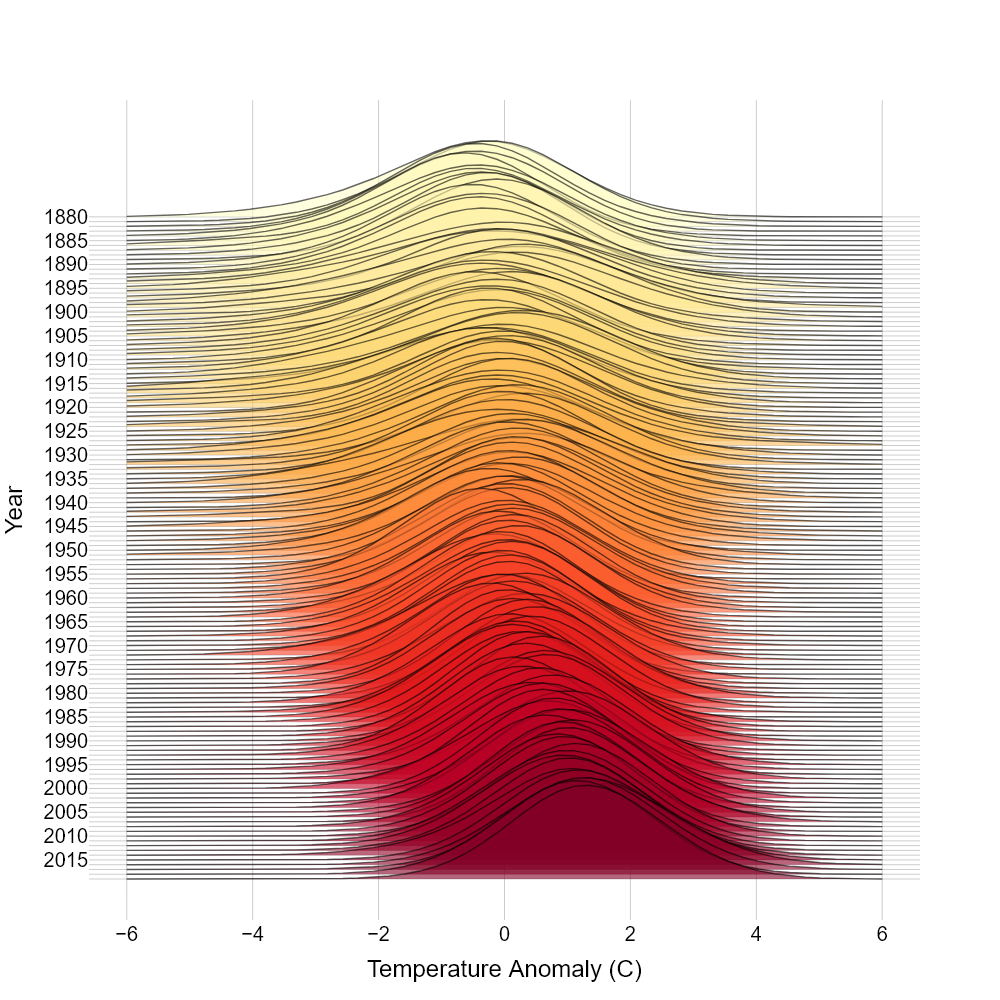

# **Pandas and Plotting**  
  
Getting a visual feel for your data is incredibly important and Pandas makes this pretty easy for you.  
There are 2 main backend engines for plotting with Pandas  
- <b>matplotlib</b>
- <b>plotly</b>

While you can set a default you can just as easily specify which you like on the fly by setting a pandas option function;
```python
pd.options.plotting.backend = "matplotlib"
```
or better yet
```python
pd.options.plotting.backend = "plotly"
```


### ***Creating a DataFrame From Lists***
  
Before we look very quickly at plotting directly from Pandas lets go back to our BerkelyEarth data and look at yet another way to create a new DataFrame directly from lists.  
To make this work we cast the data to lists and then use the handy Python function <b>zip()</b> to zip the list together. 
  
Basically what <b>zip()</b> does is map simular indices of multiple objects, lists in our case, to a single indexed iterable object.  
We will again cast it to a list.  
  
Here we will extract out the 'Year' and 'Anomaly' data for the year 2020 and create a new DataFrame with that data to use for quick plotting examples.

In [ ]:
fName = os.path.join('Data', 'Processed_BE_Daily_Anomaly_Data.csv')
df = pd.read_csv(fName)

# Extract list of data of interest to us
year    = list(df['Year'][df['Year'] == 2020])
anomaly = list(df['Anomaly'][df['Year'] == 2020])

# Build a new dataframe from our data lists
anom2020 = pd.DataFrame(list(zip(year, anomaly)), columns=['Year','Anomaly'])

anom2020

### **matplotlib**  

First we will look at a plotting example using matplotlib as our plotting engine to plot out the 'Anomaly' column data.


In [ ]:
pd.options.plotting.backend = "matplotlib"

fig = anom2020['Anomaly'].plot()

fig

### **plotly**  
  
Now lets look at using Plotly for the plotting engine  to plot out the same 'Anomaly' column data.

In [ ]:
pd.options.plotting.backend = "plotly"

fig = anom2020['Anomaly'].plot()

fig.show()

In [ ]:
fig = anom2020['Anomaly'].plot.bar()

fig.show()

In [ ]:
fig = anom2020['Anomaly'].plot.area()
fig.show()

Below is a full list of the different plots you can create plotting directly from Pandas.  
  
| Plot Type | Description |
|:---------- |:----------- |
| **line** | line plot (default) |
| **bar** | vertical bar plot |
| **barh** | horizontal bar plot |
| **hist** | histogram |
| **box** | boxplot |
| **kde** | Kernel Density Estimation plot |
| **density** | same as ‘kde’ |
| **area** | area plot |
| **pie** | pie plot |
| **scatter** | scatter plot |
| **hexbin** | hexbin plot  |


We can go more advanced then this using Plotly without diving fully into Plotly. But if you want to easily produce quick interactive plots then Plotly, in particular Plotly express is, in my opinion, your best and fastest tool for data exploration.

I will not go any deeper into plotting as its a very rich and deep topic which requires its own workshop.  

# <span style="background:orange">***&emsp;Upcoming Visualization Workshops&emsp;***</span>  

**<a href="https://calendar.colorado.edu/event/data_visualization_diving_in_with_plotly?utm_campaign=widget&utm_medium=widget&utm_source=University+of+Colorado+Boulder#.YfMQ1vhlAUE">"Data Visualization: Diving in with Plotly"</a> Tues Feb 15th at 2pm** - I will be using data we created today in parts of that workshops as well!
  
  
For those wishing to learn how to go beyond the simple static, boring chart and truly tell the story your data deserves come join me on the wildest, funnest and most important ride of your visualization life where I show you how to use the software I and everyone else in the movie/TV/Streaming industry uses to turn your data into a video story to share with the world using DaVinci Resolve.  
Oh and its all <i><b>FREE</b></i>!!!
  
**<a href="https://calendar.colorado.edu/event/data_visualization_the_ultimate_level_video_production_part_1?utm_campaign=widget&utm_medium=widget&utm_source=University+of+Colorado+Boulder#.YfQfSPhlAUE">"Data Visualization the Ultimate Level: Video production (Part 1)"</a> Tues March 1st at 2pm**
  
**<a href="https://calendar.colorado.edu/event/data_visualization_the_ultimate_level_video_production_part_2?utm_campaign=widget&utm_medium=widget&utm_source=University+of+Colorado+Boulder#.YfmiYfhlAUE">"Data Visualization the Ultimate Level: Video production (Part 2)"</a> Tues March 8th at 2pm**
  
**<a href="https://calendar.colorado.edu/event/data_visualization_the_ultimate_level_follow_up_bonus_clinic?utm_campaign=widget&utm_medium=widget&utm_source=University+of+Colorado+Boulder#.YfQfq_hlAUE">"Data Visualization the Ultimate Level: Follow Up Bonus Clinic"</a> Tues March 15th at 2pm - This one is all about you. Answering your questions, giving feedback, helping you out in whatever you may desire.**

 

# **<span style="background:yellow">&emsp;Bonus Sections for Your Later Exploration&emsp;</span>** 

  
We have barely scratched the surface of Pandas and data exploration and analysis with Pandas. In fact we have already, most likely, skipped over a section on conditional functions which are vitally important to intermedate to advanced data work flows.  
  
However, below are too short sections describing a couple of the important topics which are more advanced then this introduction but are none-the-less important for you to become familair with.  


## **Use Parquet instead of CSV For larger Data!**  
  
Both Excel and csv files are extremly common data file formats people work with.  
However if your data is much larger in size, roughly speaking >50 MB's deffinently >100MB's you should concider saving your data out as a Parquet file.  
  
Why Parquet?  
Excel and csv formats are more row performant based while parquet is columnar performant. No need to try and understand this other then noting the most important issue - 
Parquet builds smaller files and thus works with them faster!  
  
<b>Working with Parquet:</b> To work with Parquet you need to install either the <b>fastparquet</b> or <b>pyarrow</b> package.  
Once you have one of the above packages installed you do NOT need to actually import it. If its there Pandas will import it in the background for you!  
  
To use Parquet you can simply replace the csv functions with parquet as well as the file extensions;
- Reading files from <code><i>DataFrame</i>.to_csv("<i>filename.csv</i>")</code> ==> <code><i>DataFrame</i>.to_parquet("<i>filename.parquet</i>")</code>
- Writing files from <code><i>DataFrame</i>.read_csv("<i>filename.csv</i>")</code> ==> <code><i>DataFrame</i>.read_parquet("<i>filename.parquet</i>")</code>
  
  
Now for the real fun. While just saving to a parquet file format you can see a healthy file size reduction (usually >40% smaller).  
  
But you can go one step further and have Pandas compress your Parquet file by zipping it up into a <b>.gzip</b> file.   
Another advantage to using <b>.gzip</b> is if you need to share your files with collaborators the much smaller sizes make uploading and downloading them much faster as well.  
  
The only additional thing you need to deal with is telling the <b>to_parquet()</b> the compression method you desire and the appropriate file extension.  
For example;  
```python
DataFrame.to_parquet("filename.gzip", compression='gzip')
```



#### ***A quick snapshot example***  
  
Just for the purposes of an example of converting a file from csv to parquet this is all you really need to do.  

```python
fName = os.path.join('Data', 'My_cool_but_large_data.csv')
df = pd.read_csv(fName)

#
# Do all your processing you desire
#

# Save the DataFrame as a Parquet file
fName = os.path.join('Data', 'My_processed_data.parquet')
df.to_parquet(fName)

# Alternativly as a gzipped file
fName = os.path.join('Data', 'My_processed_data.gzip')
df.to_parquet(fName, compression='gzip')
```

Heres a real case, and normal, example of benefits from some files processed for a later DaVinci Resolve workshop.    
  
Orginal .csv file size = 137.6 MB's  
Saved out as a .parquet (not gzipped) file with no other changes = 52.8 MB's!!   
  
Thats a 54.4% decrease in file size meaning less spaced needed to store the file more RAM available to process the data and faster Pandas processing!!!

## **Beyond Pandas - XArray, Dask, Vaex, cuDF**  
  
I needed to mention that when your data turns into large data (say with millions of rows and/or columns) then Pandas becomes a questionable choice for your data needs.  
Likewise for scientific data you may be using special file formats such as netCDF, HDF4, HDF5 or others.   
  
In both of these cases you should look into <b>XArray</b> and/or <b>Dask</b>.  
These packages are built to look and feel pretty much just like Pandas and includes many of the same functions and operations.  
Often not much of your Pandas codes needs changed at all.

The added advantage of working with Dask as part of your data pipeline is that it provides 3 MASSIVE advantages especially when used in conjunction with XArray.  
- Works with file formats not properly accessible with Pandas!
- Works seemlessly, quickly and with no additional code with data to large to fit in available RAM!
- It works in parallel with all cores you have available not just one!  
  
The real power here lies in the ability to combine both XArray and Dask, heck sometimes even Pandas functionality together in your workflow.  
  

Yet these are not the only Pandas like packages out there. There are many and many others being developed all the time.  
The one thing they have in common is that, as much as possible, are designed to mimick the look and feel of working with Pandas.  
  
The advantages to the newer ones? They all try to work faster and against larger data!  
  
**<a href="">""</a>**    
These packages well worth a good look at are if you really need more umph from your data workflow pipeline;
- **<a href="https://xarray.pydata.org/en/stable/">XArray</a>**
- **<a href="https://docs.dask.org/en/latest/">Dask</a>**
- **<a href="https://vaex.io/docs/index.html">Vaex</a>**
- **<a href="https://docs.rapids.ai/api/cudf/stable/">cuDF</a>**  - (part of the NVidia Rapids framework for GPU base workflows) 

#### ***A quick snapshot example***

As a quick example, below is a snapshot of some code used to create data for a later DaVinci Resolve workshop.  
A bunch of MODIS files where downloaded from an LDAAC server as HDF4 files.  
  
To process all these files to just what was needed for a seriers of animations I;
 - Cycled through all my data files in my data directory using the <b>glob</b> package
 - For each file I opened them with <b>XArray</b> in conjunction with <b>rioxarray</b> as the rasterio engine
 - I dropped all the variables and dimensions I did not need
 - I added new metadata for each file
 - I converted temperature data from degress kelvin to celsius
 - Then saved it all out with a more appropriate filename for my needs using the netCDF file format
  
Total runtime using this method across all these files took only an hour.  
Total runtime if I tried this with Pandas? Just a few fractions of seconds before it complained it could not do almost any of this!
  
Why go through all of this?  
The original raw data files totaled 179.3 GB's (puny compared to other data I processed for the DaVinci and other workshops but still!!!)
Getting the data to a useable format and only what I needed totaled to only 50.8 GB's!

For geosciences and astorphysics its fairly common to have hundreds or thousands of files with each file being >35 GB's so processing >>TB of data quickly (enough) is extremely important and Dask, XArray and the other tools mentioned all make that happen!
  

```python
import numpy as np
import xarray as xr
import rioxarray as rxr
import os
from glob import glob


def process_modis_data(fName):
    # Open each file as an XArray Dataset using the rioxarray rasterio as the background engine
    modis = xr.open_dataset(fName, engine='rasterio')

    # Drop everything except the land Surface Temperature (LST)
    modis = modis.drop(['Clear_sky_nights', 'Percent_land_in_grid', 'QC_Day', 'Day_view_time', 'Day_view_angl', 'Clear_sky_days', 'LST_Night_CMG', 'QC_Night', 'Night_view_time', 'Night_view_angl'])
    modis = modis.drop(['Emis_20', 'Emis_22', 'Emis_23', 'Emis_29', 'Emis_31', 'Emis_32', 'spatial_ref'])

    # Update the attributes for the file with reprocessing info
    modis.attrs['UNITS'] = 'celsius'
    modis.attrs['REPROCESSING_AUTHOR']='Tim Dunn'
    modis.attrs['REPROCESSING_DATE']='Jan 2022'
    modis.attrs['REPROCESSING_OUTPUT_FORMAT']='netCDF'
    modis.attrs['REPROCESSING_NOTES']='Restricted DataSet to LST_Day_CMG and converted from kelvin to celsius for the sole purpose of CU CRDDS tutorial workshops'

    # Convert degrees kelvin to celsius
    a = modis.to_dataframe()                        # To make this easier for people to understand convert from a XArray DataSet to a DataFrame
    a['LST_Day_CMG'] = a['LST_Day_CMG']-273.15      # COnvert from degrees kelvin to celsius
    b = xr.Dataset.from_dataframe(a)                # To save as a netCDF, the way I need it, convert back from the XArray DataFrame to a XArrays DataSet
    
    # Build output path & name
    start = modis.attrs['RANGEBEGINNINGDATE'][:7]   # Extract the year and month for use as part of the file name 
    outpath = 'Processed_Data'                      # Output file directory
    fName = fName[9:]                               # Extract the base input file name as the base for the output file name
    name = f'{fName[:7]}_{fName[8:16]}_{start}.nc'  # Build the full output file name
    outname = os.path.join(outpath, name)           # Join the path and file name

    # Save the DataSet to a netCDF file
    b.to_netcdf(outname)                      
    
    print(outname)                                  # print the completed file path+name as a progress indicator since this will take about an hour to run through all the files.
    
    
inpath = os.path.join('Raw_Data', '*.hdf')

for f in glob(inpath):
    process_modis_data(f)    
```

For those wiser then needed for this workshop yes there is an even better way of working with a series of files using XArray with XArrays ability to work with files in a <i>batch</i> like mode.  
But the even better juju happens when you are doing alot more processing per file and mix in Dask.  
Alas these tricks are for an entire different, more advanced workshop.  